In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving wine.csv to wine.csv


In [ ]:
data1=pd.read_csv("wine.csv")

In [ ]:
data1.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
data1.shape

(178, 14)

In [ ]:
data1.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
data1.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [ ]:
data1.duplicated().sum()

0

In [ ]:
data=data1.drop(columns='Type')

In [ ]:
data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)
scaled_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)

In [ ]:
#creating DataFrame for PCA components
pca_component=pd.DataFrame(pca.fit_transform(scaled_data), columns=['a','b','c'])
pca_component.head()

,a,b,c
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


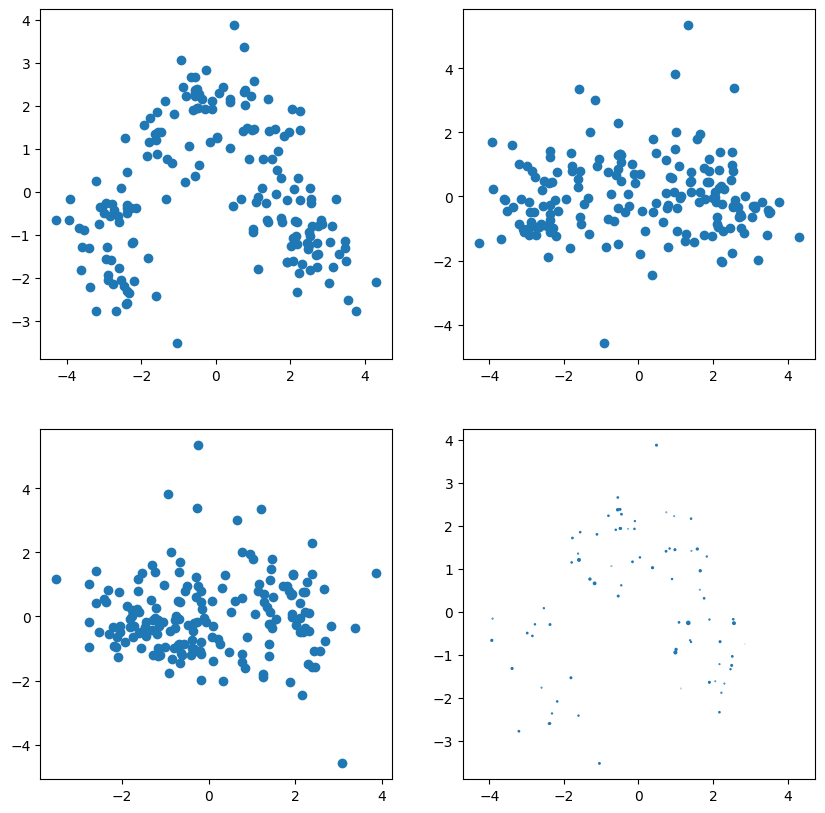

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(pca_component.a,pca_component.b)

plt.subplot(2,2,2)
plt.scatter(pca_component.a,pca_component.c)

plt.subplot(2,2,3)
plt.scatter(pca_component.b,pca_component.c)

plt.subplot(2,2,4)
plt.scatter(pca_component.a,pca_component.b, pca_component.c)

In [ ]:
#Check the variance
var=pca.explained_variance_ratio_
var
#1st component is capturing 39% of the variance and 2nd component is capturing 17% of the variance and 3rd component is capturing 0.10% of the variance

array([0.36198848, 0.1920749 , 0.11123631])

In [ ]:
# Cumulative variance
 #Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([36.2 , 55.41, 66.53])

Text(0.5, 1.0, 'Scree-Plot')

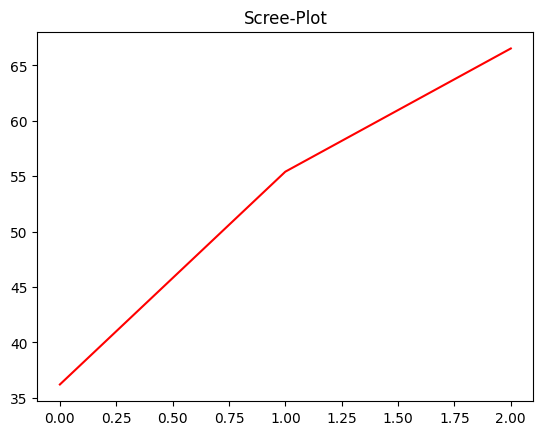

In [ ]:
# Variance plot for PCA components obtained
plt.plot(var1,color="red")
plt.title("Scree-Plot")

In [ ]:
#on x axis we have 3 Principle components
#Y axis is cumulative variance


In [ ]:
pca_values=pca_component.values

In [ ]:
pca_values[:,0:1]

array([[ 3.31675081],
       [ 2.20946492],
       [ 2.51674015],
       [ 3.75706561],
       [ 1.00890849],
       [ 3.05025392],
       [ 2.44908967],
       [ 2.05943687],
       [ 2.5108743 ],
       [ 2.75362819],
       [ 3.47973668],
       [ 1.7547529 ],
       [ 2.11346234],
       [ 3.45815682],
       [ 4.31278391],
       [ 2.3051882 ],
       [ 2.17195527],
       [ 1.89897118],
       [ 3.54198508],
       [ 2.0845222 ],
       [ 3.12440254],
       [ 1.08657007],
       [ 2.53522408],
       [ 1.64498834],
       [ 1.76157587],
       [ 0.9900791 ],
       [ 1.77527763],
       [ 1.23542396],
       [ 2.18840633],
       [ 2.25610898],
       [ 2.50022003],
       [ 2.67741105],
       [ 1.62857912],
       [ 1.90269086],
       [ 1.41038853],
       [ 1.90382623],
       [ 1.38486223],
       [ 1.12220741],
       [ 1.5021945 ],
       [ 2.52980109],
       [ 2.58809543],
       [ 0.66848199],
       [ 3.07080699],
       [ 0.46220914],
       [ 2.10135193],
       [ 1

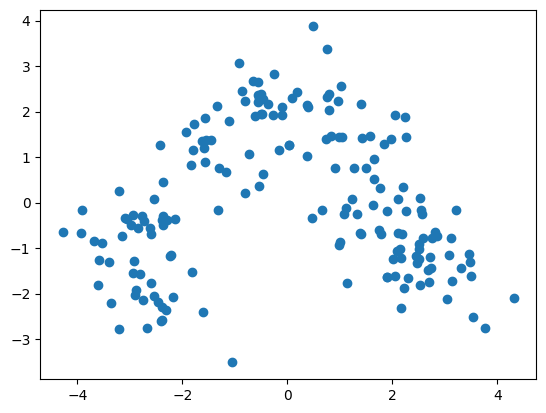

In [ ]:
# plot between PCA1 and PCA2
x = pca_values[:,0:1]
y = pca_values[:,1:2]
z = pca_values[:2:3]
plt.scatter(x,y)

In [ ]:
import pandas as pd
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2', 'pc3']), finalDf[['Type']]], axis = 1)

NameError: ignored

We got the 3 principle components we will perform KMeans and Hierarchel clustering on this now

In [ ]:
finalDf.head()

In [ ]:
finalDf.shape

KMeans

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#Hyperparameter Tuning
WCSS=[]
for i in range(1,11):
  model=KMeans(n_clusters=i, random_state=42)
  model.fit(finalDf)
  WCSS.append(model.inertia_)

In [ ]:
len(WCSS)

In [ ]:
#ELBOW PLOT

plt.plot(range(1,11), WCSS)
plt.title("Elbow plot")
plt.show()

#from the below plot we can consider k value as 3

In [ ]:
#let us consider k=3

In [ ]:
#Build Model
final_model=KMeans(n_clusters=3, random_state=42)
final_model.fit(finalDf)

In [ ]:
finalDf['ClusterId']=final_model.predict(finalDf)

In [ ]:
finalDf.head()

In [ ]:
#we will group our data based on clusters
grp=finalDf.groupby(finalDf['ClusterId'])

for x,y in grp:
  print(y)
  print('--------------------------------------------------------------------------------')

In [ ]:
finalDf['ClusterId'].value_counts()

In [ ]:
grp.agg(['mean'])

In [ ]:
#3 clusters has been formed
#Pc1, pc2 and pc3 are the principle components.
#We get this pca on the basis of the variance


silhouette_score for K means

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(finalDf, finalDf['ClusterId'] )

Hierarchial clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
model2=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  #affinity is the way in which you want to find the distance)
#as we already checked the k value using elbow plot, we will take 3
model2.fit(finalDf)
model2.labels_


In [ ]:
finalDf['Hier_ClusterId']=model2.fit_predict(finalDf)

In [ ]:
finalDf.head()

In [ ]:
#we will group our data based on clusters
grp1=finalDf.groupby(finalDf['Hier_ClusterId'])
for x,y in grp1:
  print(y)
  print("-------------------------------------------------------------------------------------------------")


In [ ]:
grp1[['pc1',	'pc2',	'pc3'	,'Type']].agg(['mean'])

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(finalDf, finalDf['Hier_ClusterId'] )

In [ ]:
#when compared to Kmeans and Hieracrchial clustering KMeans has good silhouette_score

Clustering without PCA on original data

KMEANS

In [ ]:
data.head()

In [ ]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)
scaled_data

In [ ]:
#Hyperparameter Tuning
WCSS=[]
for i in range(1,11):
  model=KMeans(n_clusters=i, random_state=42)
  model.fit(scaled_data)
  WCSS.append(model.inertia_)

In [ ]:
#ELBOW PLOT

plt.plot(range(1,11), WCSS)
plt.title("Elbow plot")
plt.show()

In [ ]:
#here we can take k=4

In [ ]:
#Build Model
final_model1=KMeans(n_clusters=4, random_state=42)
final_model1.fit(scaled_data)

In [ ]:
data['Cluster_id']=final_model1.predict(scaled_data)

In [ ]:
data.head(2)

In [ ]:
#we will group our data based on clusters
grp3=data.groupby(data['Cluster_id'])

for x,y in grp3:
  print(y)
  print('--------------------------------------------------------------------------------')

In [ ]:
grp3.agg(['mean'])

In [ ]:
###we have 4 clusters
#In cluster 3 the alcohol,Magnesium, phenols, percent, Flavanoids and Proline is high compared to others clusters
#In cluster 2 Alcalinity and Color are high and very less Flavanoids


In [ ]:
silhouette_score(scaled_data, data['Cluster_id'] )

Hierarchial Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
model3=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')  #affinity is the way in which you want to find the distance)
#as we already checked the k value using elbow plot, we will take 4
model3.fit(scaled_data)
model3.labels_


In [ ]:
data['HierClusterid']=model3.fit_predict(scaled_data)

In [ ]:
data.head()

In [ ]:
grp4=data.groupby(data['HierClusterid'])
for x,y in grp4:
  print(y)
  print("-------------------------------------------------------------------------------------------------")

In [ ]:
grp4[['Alcohol'	,'Malic',	'Ash'	,'Alcalinity'	,'Magnesium'	,'Phenols'	,'Flavanoids'	,'Nonflavanoids',	'Proanthocyanins'	,'Color'	,'Hue',	'Dilution'	,'Proline']].agg(['mean'])

In [ ]:
#4 clusters are formed
#Alcohol and Flavanoids, proline content is more in cluster 1
#color is more used in cluster 2 and Hue is very less


In [ ]:
#dendrogram

from scipy.cluster import hierarchy

In [ ]:
hr=hierarchy.linkage(scaled_data, method='complete')
dn=hierarchy.dendrogram(hr)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(scaled_data, data['HierClusterid'] )

In [ ]:
#for principal component scores we have obtained 3 clusters
#for our original data we have obtined 4 clusters.
#the silhouette_score is good for Kmeans clustering model for PCA